In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#DATA GATHERING
import json
l = []
with open('/content/drive/My Drive/TCS/Face_Recognition.json','r') as r:
    for line in r:
        l.append(json.loads(line))


After getting the dataset we have to extract all the images from it from the given link. The code below does exactly that.

In [0]:
import PIL
import matplotlib
import io
import requests
import numpy as np

from matplotlib import pyplot as plt

Imports are finished

In [0]:
def extractimage(data):
    url = data['content']

    r = requests.get(url)
    #try:
    pictures = PIL.Image.open(io.BytesIO(r.content))
    #except:
    #print(r.content)
    pic_array = []
    final_pic = []
    final_label = []
    for i in data['annotation']:
        
        arr = []
        for x,y in zip(i['points'][0].values(),i['points'][1].values()):
            
            arr.append(np.array([x,y]))
        
        arr[0] *= i['imageWidth']
        arr[1] *= i['imageHeight']
        
        final_pic.append(pictures.crop((arr[0][0],arr[1][0],arr[0][1],arr[1][1])))
        final_label.append(i['label'])
        pic_array.append(pictures.crop((arr[0][0],arr[1][0],arr[0][1],arr[1][1])))
    return final_pic,final_label

The above method fetches all the images from the links in the dataset and appends the images cropped from the mother image into '**final_pic**' array.

Subsequently the labels are also added to the '**final_label**' array

In [8]:
all_pic,all_label = [],[]
cnt = 0
for data in l:
    try:
        p,q = extractimage(data)
        all_pic.append(p)
        all_label.append(q)
        print('Processed {}'.format(cnt))
    except:
        print('Failed {}'.format(cnt))
    
    finally:
        cnt+=1

Processed 0
Processed 1
Processed 2
Processed 3
Processed 4
Processed 5
Processed 6
Processed 7
Processed 8
Processed 9
Processed 10
Processed 11
Processed 12
Processed 13
Processed 14
Processed 15
Processed 16
Processed 17
Processed 18
Processed 19
Processed 20
Processed 21
Processed 22
Processed 23
Processed 24
Processed 25
Processed 26
Processed 27
Processed 28
Processed 29
Processed 30
Processed 31
Processed 32
Processed 33
Processed 34
Processed 35
Processed 36
Processed 37
Processed 38
Processed 39
Processed 40
Processed 41
Processed 42
Processed 43
Processed 44
Processed 45
Processed 46
Processed 47
Processed 48
Processed 49
Processed 50
Processed 51
Processed 52
Processed 53
Processed 54
Processed 55
Processed 56
Processed 57
Processed 58
Processed 59
Processed 60
Processed 61
Processed 62
Processed 63
Processed 64
Processed 65
Processed 66
Processed 67
Processed 68
Processed 69
Processed 70
Processed 71
Processed 72
Processed 73
Processed 74
Processed 75
Processed 76
Processed

The pictures are processed by using of the previous method

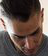

In [9]:
all_pic[78][0]
# an instance of cropped image

In [10]:
all_label[78][0]
# the label of the image

['Emotion_Neutral', 'Age_30_40', 'E_White', 'G_Male']

In [11]:
p,l = [],[]


# In[85]:


for i,j in zip(all_pic,all_label):
    
    #print(i,j)
    for x,y in zip(i,j):
        print(x,y)
        try:
            if y[0]!='Not_Face':
                p.append(x)
                l.append(y)
        except:
            print('No label')
            pass

<PIL.Image.Image image mode=RGB size=164x169 at 0x7F70193F3E80> ['Emotion_Happy', 'Age_below20', 'E_White', 'G_Male']
<PIL.Image.Image image mode=RGB size=174x154 at 0x7F7019380F28> ['Emotion_Happy', 'Age_20_30', 'E_White', 'G_ Female']
<PIL.Image.Image image mode=RGB size=79x77 at 0x7F7019CF40F0> ['Emotion_Happy', 'Age_20_30', 'E_Hispanic', 'G_ Female']
<PIL.Image.Image image mode=RGB size=73x83 at 0x7F7019380B38> ['Emotion_Happy', 'Age_20_30', 'E_White', 'G_ Female']
<PIL.Image.Image image mode=RGB size=75x71 at 0x7F701981A898> ['Emotion_Happy', 'Age_20_30', 'E_White', 'G_ Female']
<PIL.Image.Image image mode=RGB size=17x19 at 0x7F7019CF4B00> ['Emotion_Neutral', 'Age_20_30', 'E_Asian', 'G_ Female']
<PIL.Image.Image image mode=RGB size=15x15 at 0x7F7019CF4160> ['Emotion_Neutral', 'Age_below20', 'E_White', 'G_ Female']
<PIL.Image.Image image mode=RGB size=10x13 at 0x7F701981ABA8> ['Emotion_Neutral', 'Age_20_30', 'E_White', 'G_ Female']
<PIL.Image.Image image mode=RGB size=12x18 at 0x7F

The images which are not human faces are discarded along with its labels

In [12]:
pic_ethn = []
lab_ethn = []
import re
for kk in range(len(l)):
    for k in l[kk]:
        if re.match(r'E_.+',k):
            pic_ethn.append(p[kk])
            print(re.findall(r'E_.+',k)[0])
            lab_ethn.append(re.findall(r'E_.+',k)[0])
        else:
            continue
        

E_White
E_White
E_Hispanic
E_White
E_White
E_Asian
E_White
E_White
E_Asian
E_White
E_White
E_White
E_White
E_Black
E_White
E_White
E_Black
E_White
E_Asian
E_White
E_White
E_White
E_White
E_White
E_White
E_White
E_Black
E_Asian
E_White
E_White
E_White
E_White
E_White
E_White
E_White
E_White
E_White
E_White
E_Hispanic
E_White
E_Black
E_White
E_White
E_White
E_White
E_White
E_Asian
E_White
E_White
E_White
E_White
E_Asian
E_Arab
E_White
E_White
E_White
E_White
E_White
E_White
E_White
E_Black
E_White
E_White
E_White
E_White
E_White
E_Indian
E_White
E_White
E_Indian
E_Indian
E_Indian
E_Indian
E_White
E_Black
E_White
E_White
E_White
E_White
E_White
E_Indian
E_White
E_Asian
E_White
E_White
E_White
E_White
E_White
E_White
E_Asian
E_Hispanic
E_Hispanic
E_White
E_White
E_Asian
E_Asian
E_Indian
E_Indian
E_Indian
E_Indian
E_Hispanic
E_Black
E_White
E_Asian
E_Asian
E_Asian
E_Asian
E_White
E_Black
E_White
E_White
E_Black
E_White
E_White
E_White
E_Asian
E_Black
E_Black
E_Hispanic
E_Hispanic
E_Arab
E_B

This piece of code used a regular expression module in python to extract ethnicity of the pictures and forms an array comprising of those ethnicity

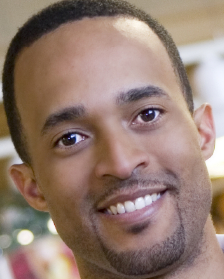

In [13]:
pic_ethn[16]
# Final array 'pic_ethn' is used for ethnicity detection

In [14]:
lab_ethn[16]
#lab_ethn is the label of ethnicity

'E_Black'

In [0]:
k = np.array([0,0])

for i in pic_ethn:
    k+=np.array(i.size)
   
k = k/len(pic_ethn)

In [16]:
#k is the tuple of (width,height) which is the average width and height of all images
k

array([72.86363636, 81.82323232])

In [0]:
import cv2
def getnewimg(data):
  
 
  #img = cv2.imread(data, cv2.IMREAD_UNCHANGED)
  data = np.asarray(data)
  print('Original Dimensions : ',data.shape)
  try:
    i = data.shape[2]
  except:
    data = np.dstack([data] * 3)
    print('Modified Original Dimensions : ',data.shape)
    
  finally:
  
    dim = (int(k[0]), int(k[1]))
    # resize image
    resized = cv2.resize(data, dim, interpolation = cv2.INTER_AREA)
    print('returned size {}'.format(np.array(resized).shape))
    if np.array(resized).shape[2]==4:
      
      resized = resized[:,:,0:3]
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return np.array(resized)
  

the above code resizes the images

In [18]:
getnewimg(pic_ethn[17]).shape

Original Dimensions :  (19, 20)
Modified Original Dimensions :  (19, 20, 3)
returned size (81, 72, 3)


(81, 72, 3)

In [19]:
mod_img = np.array([np.zeros((81,72,3),dtype = float) for i in range(len(pic_ethn))])
for i in range(len(pic_ethn)):
    mod_img[i] = getnewimg(pic_ethn[i])
    i+=1



Original Dimensions :  (169, 164, 3)
returned size (81, 72, 3)
Original Dimensions :  (154, 174, 3)
returned size (81, 72, 3)
Original Dimensions :  (77, 79, 3)
returned size (81, 72, 3)
Original Dimensions :  (83, 73, 3)
returned size (81, 72, 3)
Original Dimensions :  (71, 75, 3)
returned size (81, 72, 3)
Original Dimensions :  (19, 17, 3)
returned size (81, 72, 3)
Original Dimensions :  (15, 15, 3)
returned size (81, 72, 3)
Original Dimensions :  (13, 10, 3)
returned size (81, 72, 3)
Original Dimensions :  (18, 12, 3)
returned size (81, 72, 3)
Original Dimensions :  (26, 34, 3)
returned size (81, 72, 3)
Original Dimensions :  (17, 20, 3)
returned size (81, 72, 3)
Original Dimensions :  (35, 36, 3)
returned size (81, 72, 3)
Original Dimensions :  (15, 14, 3)
returned size (81, 72, 3)
Original Dimensions :  (88, 57, 3)
returned size (81, 72, 3)
Original Dimensions :  (90, 84, 3)
returned size (81, 72, 3)
Original Dimensions :  (91, 66, 3)
returned size (81, 72, 3)
Original Dimensions 

In [20]:
train_X = np.array([getnewimg(i) for i in pic_ethn])

Original Dimensions :  (169, 164, 3)
returned size (81, 72, 3)
Original Dimensions :  (154, 174, 3)
returned size (81, 72, 3)
Original Dimensions :  (77, 79, 3)
returned size (81, 72, 3)
Original Dimensions :  (83, 73, 3)
returned size (81, 72, 3)
Original Dimensions :  (71, 75, 3)
returned size (81, 72, 3)
Original Dimensions :  (19, 17, 3)
returned size (81, 72, 3)
Original Dimensions :  (15, 15, 3)
returned size (81, 72, 3)
Original Dimensions :  (13, 10, 3)
returned size (81, 72, 3)
Original Dimensions :  (18, 12, 3)
returned size (81, 72, 3)
Original Dimensions :  (26, 34, 3)
returned size (81, 72, 3)
Original Dimensions :  (17, 20, 3)
returned size (81, 72, 3)
Original Dimensions :  (35, 36, 3)
returned size (81, 72, 3)
Original Dimensions :  (15, 14, 3)
returned size (81, 72, 3)
Original Dimensions :  (88, 57, 3)
returned size (81, 72, 3)
Original Dimensions :  (90, 84, 3)
returned size (81, 72, 3)
Original Dimensions :  (91, 66, 3)
returned size (81, 72, 3)
Original Dimensions 

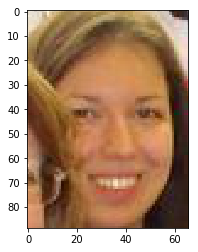

In [21]:
plt.imshow(pic_ethn[183])

In [22]:
y = []
p = list(set(lab_ethn))
print(p)
for i in lab_ethn:
    y.append(p.index(i))

['E_Hispanic', 'E_Indian', 'E_Black', 'E_Asian', 'E_Arab', 'E_White']


In [23]:
np.shape(y)

(198,)

In [24]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.datasets import mnist

In [0]:
from keras import applications

In [0]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (train_X.shape[1], train_X.shape[2], 3))

In [28]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9909703928907168634
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6565018894749075258
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2195207079009682114
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14912199066
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10830987538045597071
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [29]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [102]:
"""for layer in model.layers:
    layer.trainable = False
"""

'for layer in model.layers:\n    layer.trainable = False\n'

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 81, 72, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 81, 72, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 81, 72, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 36, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 36, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 36, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 18, 128)       0         
__________

In [104]:

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(6, activation="softmax")(x)
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [105]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 81, 72, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 81, 72, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 81, 72, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 36, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 36, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 36, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 18, 128)       0         
__________

In [106]:
model_final.fit(train_X,keras.utils.to_categorical(y),batch_size = 32,epochs = 20,validation_split=0.1)
# training a pretrained model with no data augmentation......the results are pretty poor

Train on 178 samples, validate on 20 samples
Epoch 1/20
178/178 [==============================] - 3s 20ms/step - loss: 9.1123 - acc: 0.2079 - val_loss: 5.7036 - val_acc: 0.3000
Epoch 2/20
178/178 [==============================] - 1s 3ms/step - loss: 2.3427 - acc: 0.5000 - val_loss: 1.6263 - val_acc: 0.3000
Epoch 3/20
178/178 [==============================] - 1s 3ms/step - loss: 1.4722 - acc: 0.4944 - val_loss: 1.5360 - val_acc: 0.3000
Epoch 4/20
178/178 [==============================] - 1s 3ms/step - loss: 1.3707 - acc: 0.5393 - val_loss: 1.3390 - val_acc: 0.3000
Epoch 5/20
178/178 [==============================] - 1s 3ms/step - loss: 1.3228 - acc: 0.5393 - val_loss: 1.3377 - val_acc: 0.3000
Epoch 6/20
178/178 [==============================] - 1s 3ms/step - loss: 1.3390 - acc: 0.5169 - val_loss: 1.3776 - val_acc: 0.3000
Epoch 7/20
178/178 [==============================] - 1s 3ms/step - loss: 1.2286 - acc: 0.5449 - val_loss: 1.3256 - val_acc: 0.3500
Epoch 8/20
178/178 [==========

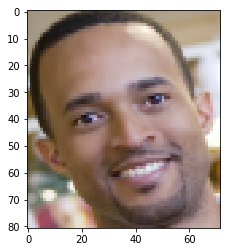

In [80]:
plt.imshow(train_X[16])

In [0]:
x_train,y_train = train_X[0:120],keras.utils.to_categorical(y[0:120])

In [0]:

datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/25,
    horizontal_flip=True
)

#datagen = keras.preprocessing.image.ImageDataGenerator()
'''datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
'''
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)
#keras.optimizers.SGD(lr=0.0001, momentum=0.9)

In [109]:
model_final.compile(loss = "categorical_crossentropy", optimizer =keras.optimizers.SGD(lr=0.0001, momentum=0.9),metrics=["accuracy"])
model_final.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=50)
#this is training by augmentation of the train dataset

Epoch 1/50
4/3 [================================] - 3s 727ms/step - loss: 1.3486 - acc: 0.5796
Epoch 2/50
4/3 [================================] - 0s 93ms/step - loss: 1.3187 - acc: 0.6133
Epoch 3/50
4/3 [================================] - 0s 94ms/step - loss: 1.3090 - acc: 0.6271
Epoch 4/50
4/3 [================================] - 0s 95ms/step - loss: 1.2728 - acc: 0.6350
Epoch 5/50
4/3 [================================] - 0s 95ms/step - loss: 1.2554 - acc: 0.6288
Epoch 6/50
4/3 [================================] - 0s 95ms/step - loss: 1.2641 - acc: 0.6350
Epoch 7/50
4/3 [================================] - 0s 94ms/step - loss: 1.2030 - acc: 0.6350
Epoch 8/50
4/3 [================================] - 0s 94ms/step - loss: 1.2451 - acc: 0.6225
Epoch 9/50
4/3 [================================] - 0s 96ms/step - loss: 1.2540 - acc: 0.6350
Epoch 10/50
4/3 [================================] - 0s 95ms/step - loss: 1.2282 - acc: 0.6288
Epoch 11/50
4/3 [================================] - 0s 95

In [113]:
model_final.evaluate(train_X[0:120],keras.utils.to_categorical(y[0:120]))
#evaluating train accuracy......it comes about 69% with data augmentation

120/120 [==============================] - 0s 1ms/step


[0.7203135093053182, 0.6916666686534881]

In [112]:
model_final.evaluate(train_X[120:],keras.utils.to_categorical(y[120:]))
# test acc on 78 samples

78/78 [==============================] - 0s 1ms/step


[0.9323598452103443, 0.5897435905077518]